In [4]:
!pip install tensorflow

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [14]:
admissions = pd.read_csv('admissions_data.csv')
admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


This dataset has nine different columns:

* **Serial No.:** Index of each row (1-500)
* **GRE Score:** GRE test score (out of 340)
* **TOEFL Score:** TOEFL test score (out of 120)
* **University Rating:** Evaluated university rating (out of 5)
* **SOP:** Statement of Purpose Strength (out of 5)
* **LOR:** Letter of Recommendation Strength (out of 5)
* **CGPA:** Undergraduate GPA (out of 10)
* **Research:** Has research experience (either 0 or 1)
* **Chance of Admit:** Applicant’s chance of being admitted (ranging from 0 to 1)

In [18]:
admissions.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [20]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [34]:
# Split the data into feature parameters and the labels
features = admissions.iloc[:,:-1]
# Drop the index feature
features = features.drop(['Serial No.'], axis=1)

labels = admissions.iloc[:,-1]

In [36]:
# Split data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=8, test_size=0.2)

In [38]:
# Scale data
sc = StandardScaler()
features_train_scaled = sc.fit_transform(features_train)
features_test_scaled = sc.transform(features_test)
                                    

In [68]:
# Create a function to design a neural network model
def design_model(features):
    # Initialize tf.keras.Sequential() object
    model = Sequential()
    # Input layer
    input = layers.InputLayer(input_shape=(features.shape[1],))
    model.add(input)
    # Hidden layer 1 with drop out
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.1))
    # Output layer
    model.add(layers.Dense(1))
    # Optimizer
    opt = Adam(learning_rate=0.01)
    model.compile(loss='mse',metrics=['mae'],optimizer=opt)
    return model

In [70]:
# Initialise the design_model function
model = design_model(features_train_scaled)

# Apply early stopping for efficiency
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

# Fit the model to the training data ith 100 epochs and a batch size of 3
history = model.fit(features_train_scaled, labels_train, epochs=100, batch_size=5, verbose=1, validation_split=0.25, callbacks=[es])
test_mse, test_mae = model.evaluate(features_test_scaled, labels_test, verbose=0)
print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')

Epoch 1/100


C:\Users\CristinaFC\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2712 - mae: 0.4089 - val_loss: 0.0173 - val_mae: 0.1095
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0301 - mae: 0.1293 - val_loss: 0.0216 - val_mae: 0.1064
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0247 - mae: 0.1106 - val_loss: 0.0068 - val_mae: 0.0650
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0163 - mae: 0.1034 - val_loss: 0.0051 - val_mae: 0.0547
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0108 - mae: 0.0846 - val_loss: 0.0058 - val_mae: 0.0594
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0072 - mae: 0.0688 - val_loss: 0.0054 - val_mae: 0.0562
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0083 - mae: 0.0702 - val_loss: 0.0051 - val_mae: 0.0535
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0072 - mae: 0.0662 - val_loss: 0.0054 - val_mae: 0.0535
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0064 - mae: 0.0

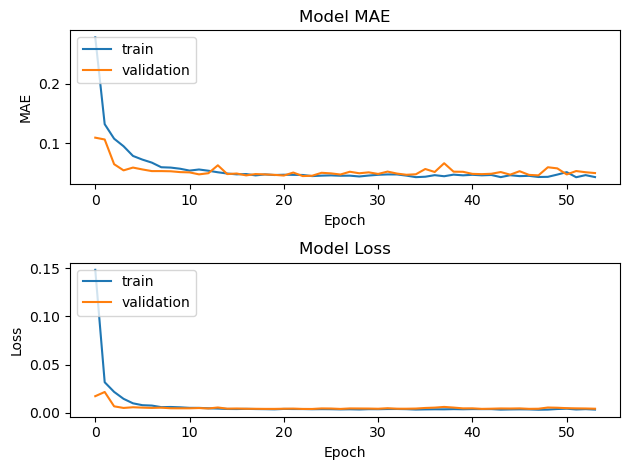

In [72]:
# Plot model performance (mae) per epoch
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('MAE')
ax1.set_title('Model MAE')
ax1.legend(['train','validation'], loc='upper left')

# Plot model loss over epoch
ax2 = fig.add_subplot(2,1,2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Model Loss')
ax2.legend(['train','validation'],loc='upper left')

# Use to keep models from overlapping
fig.tight_layout()


In [76]:
# Evaluate model predictive power with r2_score
labels_test_pred = model.predict(features_test_scaled)
r2 = r2_score(labels_test, labels_test_pred)
print(f'R2 score: {r2}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
R2 score: 0.7784399480681845
